**MNIST Digit Classification**<br>

---


Algorithm Used: Convolutional Neural Networks<br>
Author: Pranay Saha<br>
Date: 20/09/2019

In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


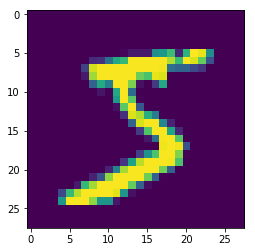

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [0]:
from keras.utils import to_categorical
X_train= X_train.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
my_model= Sequential()
my_model.add(Conv2D(32, kernel_size= (3,3), input_shape=(28,28,1), activation= 'relu', kernel_initializer='uniform'))
my_model.add(MaxPooling2D(pool_size= (2,2)))
my_model.add(Conv2D(64, kernel_size= (3,3), input_shape=(28,28,1), activation= 'relu', kernel_initializer='uniform'))
my_model.add(MaxPooling2D(pool_size= (2,2)))
my_model.add(Flatten())
my_model.add(Dense(1000, activation= 'relu', kernel_initializer='uniform'))
my_model.add(Dense(10, activation= 'softmax'))
# my_model.add(Dropout())

In [0]:
from keras.optimizers import SGD
my_model.compile(optimizer= SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
X_train = X_train.astype('float32')
X_train/=255

X_test = X_test.astype('float32')
X_test/=255

In [28]:
my_model.fit(X_train, y_train, epochs= 10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.4889 - acc: 0.8651 - val_loss: 0.1613 - val_acc: 0.9516
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1465 - acc: 0.9544 - val_loss: 0.1165 - val_acc: 0.9637
Epoch 3/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1020 - acc: 0.9685 - val_loss: 0.0743 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0798 - acc: 0.9757 - val_loss: 0.0627 - val_acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0679 - acc: 0.9783 - val_loss: 0.0661 - val_acc: 0.9805
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0598 - acc: 0.9816 - val_loss: 0.0599 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0525 - acc: 0.9832 - val_loss: 0.0523 - 

In [29]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [31]:
score = my_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04217444500348065
Test accuracy: 0.9863


In [32]:
my_model.predict(X_test)

array([[2.2473843e-09, 4.8346571e-08, 1.4080730e-06, ..., 9.9995327e-01,
        7.2561397e-09, 3.4571795e-07],
       [4.8007598e-07, 1.5316715e-06, 9.9999774e-01, ..., 8.2991882e-14,
        2.7230348e-07, 3.5485304e-17],
       [5.1547426e-07, 9.9992895e-01, 1.1632527e-05, ..., 3.1812135e-05,
        1.3187215e-05, 2.0105206e-07],
       ...,
       [8.1683818e-12, 3.2127545e-09, 2.2341624e-13, ..., 4.0891468e-08,
        1.7126956e-08, 6.6843853e-08],
       [2.1001954e-07, 2.2398610e-09, 4.7234296e-11, ..., 1.3126032e-10,
        1.6296076e-04, 4.4334725e-10],
       [1.1851645e-08, 2.5467461e-11, 9.7980690e-10, ..., 6.5496103e-16,
        2.2420229e-08, 1.2811555e-12]], dtype=float32)